In [17]:
from jive.AJIVE import AJIVE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from jive.PCA import PCA



%matplotlib inline


In [4]:

p = np.array([100,100,100,100,100,100])

#creates the blobs
j = make_blobs(n_features=12,n_samples=p, cluster_std= 4,random_state= 1)
k = make_blobs(n_features = 27,n_samples = p,cluster_std = 3,random_state=23)
l = make_blobs(n_features = 22,n_samples = p,cluster_std = 5,random_state=35)
m = make_blobs(n_features = 32,n_samples = p,cluster_std = 5,random_state=52)
n = make_blobs(n_features = 15,n_samples = p,cluster_std = 7,random_state=2)


v1 = j[0]
v2 = k[0]
v3 = l[0]
v4 = m[0]
v5 = n[0]

Views = [v1,v2,v3,v4,v5]

In [5]:
# This creates a single-view dataset by concatenating the multiple views as features of the first view (Naive multi-view)

arrays = []

for i in [j,k,l,m,n]:
    df = pd.DataFrame(i[0])
    df['Class'] = i[1]
    df = df.sort_values(by = ['Class'])
    y = np.array(df['Class'])
    df = df.drop(['Class'],axis = 1)
    arrays.append(np.array(df))    
    
Views = arrays

Views_concat = np.hstack((arrays[0],arrays[1],arrays[2],arrays[3],arrays[4]))



Text(0, 0.5, 'Feature 2')

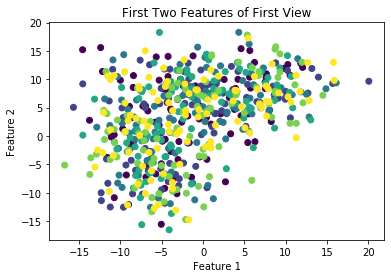

In [6]:
ax = plt.subplot(111)
plt.scatter(v1[:,0],v1[:,1],c = y)
plt.title('First Two Features of First View')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


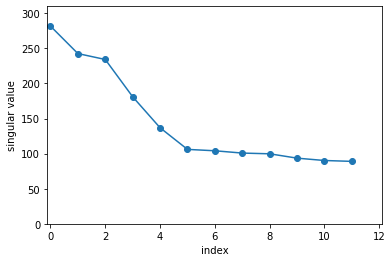

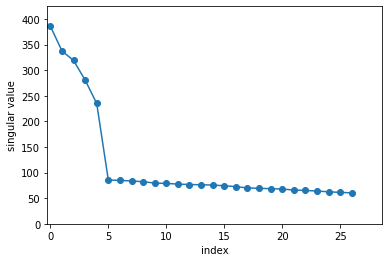

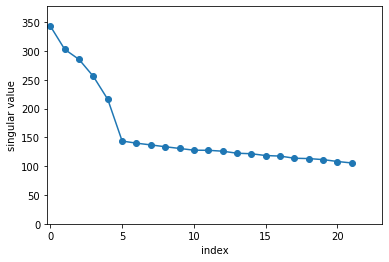

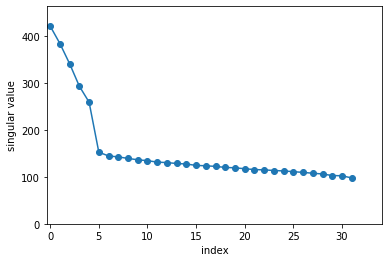

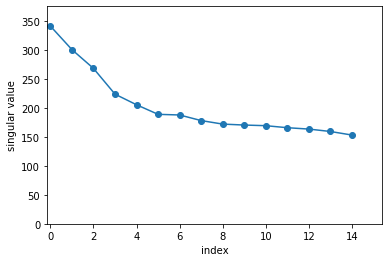

In [20]:
for i in Views:
    plt.figure()
    PCA().fit(i).plot_scree()


In [21]:
ajive = AJIVE(init_signal_ranks={'v1': 5,'v2': 5,'v3': 5,'v4': 5, 'v5': 5})
ajive.fit(blocks={'v1': v1,'v2': v2,'v3': v3,'v4': v4, 'v5': v5})



AJIVE, joint rank: 0, block v1 indiv rank: 5, block v2 indiv rank: 5, block v3 indiv rank: 5, block v4 indiv rank: 5, block v5 indiv rank: 5

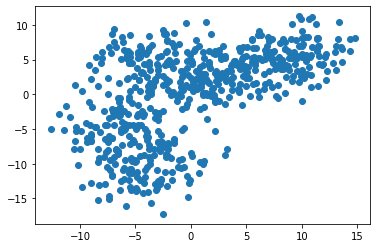

In [50]:
d =ajive.get_full_block_estimates()
x = d['v1']['individual'][0]
y = d['v1']['individual'][1]

plt.scatter(x,y)

In [60]:
d['v1']['individual'][0] + d['v1']['noise'][0] + d['v1']['joint'][0]

0      4.141350
1      2.385922
2     -9.671342
3     -4.296483
4     -3.888730
         ...   
595    5.283615
596   -5.571267
597   -0.253837
598    0.564082
599   -4.637189
Name: 0, Length: 600, dtype: float64

In [65]:
vi = ['v1','v2','v3','v4','v5']

for i in vi:    
    print(np.sum(np.sum(d[i]['joint'])))

0.0
0.0
0.0
0.0
0.0


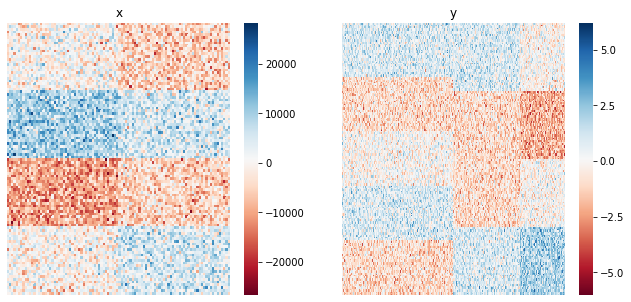

In [10]:
from jive.AJIVE import AJIVE
from jive.PCA import PCA
from jive.ajive_fig2 import generate_data_ajive_fig2
from jive.viz.block_visualization import data_block_heatmaps, jive_full_estimate_heatmaps

X, Y = generate_data_ajive_fig2()

plt.figure(figsize=[11,  5])
data_block_heatmaps({'x': X, 'y': Y})



In [15]:
print(Y.shape,X.shape)

print(v1.shape,v2.shape)

(100, 10000) (100, 100)
(600, 12) (600, 27)
